#***Deep Learning CS551 Assignment 1 Solution by Vipin_2011MT22***



In [ ]:
# importing library 
import numpy as np 
import pandas as pd
from sympy import *
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as la
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

#Q1. Find out the eigen value and eigen vector of a given matrix using python library

X = [[1, 2, 3],
[2, 3, 4],
[4, 5, 6]]

In [ ]:
m = np.array([[1, 2, 3], 
              [2, 3, 4], 
              [4, 5, 6]]) 

w, v = np.linalg.eig(m)

print("Eigen values of the given square array:\n", w, "\n\n")
print("Eigenvectors of the given square array:\n", v) 

Eigen values of the given square array:
 [ 1.08309519e+01 -8.30951895e-01 -1.24701000e-16] 


Eigenvectors of the given square array:
 [[ 0.34416959  0.72770285  0.40824829]
 [ 0.49532111  0.27580256 -0.81649658]
 [ 0.79762415 -0.62799801  0.40824829]]


#Q2. Find the dot product of two vectors v = [1,2] and w =[1,1]


In [ ]:
a = [1,2] 
b = [1, 1]

dotproduct= np.dot(a, b)

print("Dot product of two vectors:\n", dotproduct) 

Dot product of two vectors:
 3


#Q3. Find out the trace of a matrix given below using python.
X = [[1, 2, 3],
[4, 5, 6],
[7, 8, 9]]


In [ ]:
m = np.array([[1,2,3],[4,5,6],[7,8,9]])

trace = m.trace()

print("Trace of a matrix:\n", trace) 

Trace of a matrix:
 15


#Q4: Write a python program to perform the following set of operations on the augmented matrix derived from the system of linear equations given below.
(a) Generate Row Echelon Form (REF)

(b) Generate Reduced Row Echelon Form (RREF)

(c) Perform Gaussian elimination to solve the below system of linear equation

(d) Perform Gauss–Jordan elimination to solve the below system of linear equation

Test Case:

Input:

X+y+2z = 9,
2x+4y-3z = 1,
3x+6y-5z =0

Output:

x = 1, y =2 , z =3


(a)

In [ ]:
A = np.array([[1,1,2],[2,4,-3],[3,6,-5]], dtype='float')
B = np.array([[9],[1],[0]], dtype='float')
M = np.hstack([A,B])
print("Augumented matrix derived from system of linear equation is: \n\n ", M)

Augumented matrix derived from system of linear equation is: 

  [[ 1.  1.  2.  9.]
 [ 2.  4. -3.  1.]
 [ 3.  6. -5.  0.]]


In [ ]:
def REF(M):
    r, c = M.shape
    if r == 0 or c == 0:
        return M
    for i in range(len(M)):
        if M[i,0] != 0:
            break
    else:
        y = REF(M[:,1:])
        return np.hstack([M[:,:1], y])
    if i > 0:
        ith_row = M[i].copy()
        M[i] = M[0]
        M[0] = ith_row
    M[0] = M[0] / M[0,0]
    M[1:] -= M[0] * M[1:,0:1]
    y = REF(M[1:,1:])
    return np.vstack([M[:1], np.hstack([M[1:,:1], y]) ])


print("Generate Row Echelon Form (REF): \n\n", REF(M))

Generate Row Echelon Form (REF): 

 [[ 1.   1.   2.   9. ]
 [ 0.   1.  -3.5 -8.5]
 [ 0.   0.   1.   3. ]]


(b)

In [ ]:
def RREF(M):
    A = np.array(M, dtype=np.float64)
    i = 0 
    j = 0 
    while True:
        while all(A.T[j] == 0.0):
            j += 1
            if j == len(A[0]) - 1 : break
        if A[i][j] == 0:
            i_ = i
            while A[i_][j] == 0:
                i_ += 1
                if i_ == len(A) - 1 : break
            A[[i, i_]] = A[[i_, i]]
        A[i] = A[i] / A[i][j]
        for i_ in range(len(A)):
            if i_ != i:
                A[i_] = A[i_] - A[i] * A[i_][j] / A[i][j]
        if (i == len(A) - 1) or (j == len(A[0]) - 1): break
        i += 1
        j += 1
    return A

print("Generate Reduced Row Echelon Form (RREF): \n\n", RREF(M))

Generate Reduced Row Echelon Form (RREF): 

 [[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 3.]]


(c)

In [ ]:
print("Gauss elimination to solve given syatem of linear equation \n\n")

n = int(input('Enter number of unknowns: '))
R = np.zeros((n,n+1))
x = np.zeros(n)
print('Enter Augmented Matrix Coefficients:')
for i in range(n):
    for j in range(n+1):
        R[i][j] = input( 'R['+str(i)+']['+ str(j)+']=')

for i in range(n):
    if R[i][i] == 0.0:
        sys.exit('Divide by zero detected!')    
    for j in range(i+1, n):
        ratio = R[j][i]/R[i][i]
        for k in range(n+1):
            R[j][k] = R[j][k] - ratio * R[i][k]
x[n-1] = R[n-1][n]/R[n-1][n-1]
for i in range(n-2,-1,-1):
    x[i] = R[i][n]  
    for j in range(i+1,n):
        x[i] = x[i] - R[i][j]*x[j]  
    x[i] = x[i]/R[i][i]

for i in range(n):
    print('\n\nX%d = %0.2f' %(i,x[i]), end = '\t')

Gauss elimination to solve given syatem of linear equation 


Enter number of unknowns: 3
Enter Augmented Matrix Coefficients:
R[0][0]=1
R[0][1]=1
R[0][2]=2
R[0][3]=9
R[1][0]=2
R[1][1]=4
R[1][2]=-3
R[1][3]=1
R[2][0]=3
R[2][1]=6
R[2][2]=-5
R[2][3]=0


X0 = 1.00	

X1 = 2.00	

X2 = 3.00	

(d)

In [ ]:
print("Gauss Jordan elimination to solve given syatem of linear equation \n\n")

n = int(input('Enter number of unknowns: '))
D = np.zeros((n,n+1))
x = np.zeros(n)
print('Enter Augmented Matrix Coefficients:')
for i in range(n):
    for j in range(n+1):
        D[i][j] = float(input( 'D['+str(i)+']['+ str(j)+']='))

for i in range(n):
    if D[i][i] == 0.0:
        sys.exit('Divide by zero detected!')       
    for j in range(n):
        if i != j:
            ratio = D[j][i]/D[i][i]

            for k in range(n+1):
                D[j][k] = D[j][k] - ratio * D[i][k]

for i in range(n):
    x[i] = D[i][n]/D[i][i]

for i in range(n):
    print('\n\n X%d = %0.2f' %(i,x[i]), end = '\t')

Gauss Jordan elimination to solve given syatem of linear equation 


Enter number of unknowns: 3
Enter Augmented Matrix Coefficients:
D[0][0]=1
D[0][1]=1
D[0][2]=2
D[0][3]=9
D[1][0]=2
D[1][1]=4
D[1][2]=-3
D[1][3]=1
D[2][0]=3
D[2][1]=6
D[2][2]=-5
D[2][3]=0


 X0 = 1.00	

 X1 = 2.00	

 X2 = 3.00	

#Matrix factorization using SGD

Q5. Assume R is a mXn matrix with each entry is an integer in [0, 5] i.e. moving rating m users have given to n movies. Find the factorization of matrix R = P Q using approximation method.

Where P and Q have size (k × m) and (k × n) and k<m and k<n.

Update rule for Pc and Qc (column vectors of P, Q respectively) are as follows:

Pc<- Pc +s*(eQc-t*Pc)

Qc<- Qc +s*(ePc-t*Qc)

Where s, t are from [0,1]. e= R_{i, j} - (Pc) Qc .

E = ||R − P Q||

1)Find k, s and t for least E. (use hyperopt or sklearn library for gridsearch.)

2)Plot graph for E vs k.

*Each user (Pc) and movie (Qc) are defined by k features (k sized 1-d vector) which best
describes their characteristics in latent space.


(a)

In [ ]:
def matrix_factorization(R, P, Q, K,s,t):
  e = 0
  iteration = 2000
  Q = Q.T
  for l in range(iteration):
    for i in range(len(R)):
      for j in range(len(R[i])):
        if R[i][j] > 0:
          eij = R[i][j] - np.dot(P[i,:],Q[:,j])
          for k in range(K):
            P[i][k] = P[i][k] + s * (eij * Q[k][j] - t * P[i][k])
            Q[k][j] = Q[k][j] + s * (eij * P[i][k] - t * Q[k][j])
    # error in prediction        
    for i in range(len(R)):
      for j in range(len(R[i])):
        if R[i][j] > 0:
          for k in range(K):
            e = e + (R[i][j] - np.dot(P[i,:],Q[:,j]))                 
  return np.dot(P,Q),e

R = np.random.randint(6, size=(5, 4))
n = len(R)
m = len(R[0])

s_value = [0.0001,0.0002,0.0003,0.0004,0.0005]
t_value = [0.01,0.02,0.03,0.04,0.05]

err = []
a = []
b = []
k = []
for s in s_value:
  for t in t_value:
    for K in range(1,5):
      P = np.random.rand(n,K)
      Q = np.random.rand(m,K)
      E,error = matrix_factorization(R, P, Q, K,s,t)
      err.append(error) 
      a.append(s)
      b.append(t)
      k.append(K) 
result = pd.DataFrame.from_dict({"Error":err,"s":a,"t":b,"K":k})
result

minvalue = result['Error'].min() 
minvalue

minindex = result['Error'].idxmin() 
minindex 

print('For least Error:')
print('Value of s is: ',result.s[minindex])
print('Value of t is: ',result.t[minindex])
print('Value of K is: ',result.K[minindex])


For least Error:
Value of s is:  0.0005
Value of t is:  0.02
Value of K is:  1


(b)

# Q6. Find the partial derivative of ||LU − A|| (a function of squared frobenius norm) with respect to U. Where L, U and A are all matrices.

In [ ]:
#Defining function for partial derivative of ||LU-A|| wrt U

def parder(L,U,A):
  L_transpose = [[L[j][i] for j in range(len(L))] for i in range(len(L[0]))]
  a = L*U-A
  z = L_transpose*a
  PD = 2*z
  return PD


In [ ]:
#Testing frobenius norm partial derivative by taking any random matrix L U A

L = np.matrix([[4,3,6],[8,6,2],[7,6,5]])
U = np.matrix([[8,3,4],[8,3,7],[7, 5, 5]])
A = np.matrix([[9,3,3],[7,2,5],[6,5,7]])

print("Frobenius norm partial derivative wrt U:\n\n")
parder(L,U,A)

Frobenius norm partial derivative wrt U:




matrix([[3022, 1392, 2042],
        [3384, 1604, 2324],
        [4004, 1862, 2724]])

# Linear Regression

#Q7. Find the linear regression model which best predicts the dependent variable (“sales”) on validation dataset.
● Divide data in 80-20 % for training and testing set.

● Use 10 fold cross validation set (10% of training dataset).

Find regression co-efficients and intercepts. Report confusion matrix on test dataset.

Link: https://raw.githubusercontent.com/manishbhnau/Repo/master/Advertising.csv


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/manishbhnau/Repo/master/Advertising.csv")

df.drop(["Unnamed: 0"],axis = 1, inplace = True);

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Televison

In [ ]:
X = df[['TV']].values
y = df['sales'].values
print(f'Shape of X is {X.shape}\nShape of y is {y.shape}')

Shape of X is (200, 1)
Shape of y is (200,)


In [ ]:
#Splitting Training and Test Set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 1) (40, 1) (160,) (40,)


In [ ]:
# fit a model
regression_model = LinearRegression()
model = regression_model.fit(X_train, y_train)

In [ ]:
print('intercept:', model.intercept_)
print('coefficients for radio:', model.coef_)

intercept: 6.799773449796853
coefficients for radio: [0.0492751]


In [ ]:
# Perform 10-fold cross validation
score = cross_val_score(LinearRegression(),X_train,y_train,cv = 10)
print('Cross-validated scores:', score)

Cross-validated scores: [0.75636914 0.73169911 0.69356755 0.57315893 0.64699324 0.48797191
 0.5235431  0.63498864 0.57887311 0.36986269]


In [ ]:
print('Mean of 10-fold cross validation score : ',score.mean())

Mean of 10-fold cross validation score :  0.5997027430081798


In [ ]:
#Making prediction using model
y_pred = model.predict(X_test)
y_pred

array([17.18696362, 16.77798032, 11.51540011, 20.60665526, 19.30579273,
       20.77419058, 14.84639657, 15.70871075, 10.2785952 , 17.41362906,
       14.90552669, 10.20961007, 17.37913649, 12.21017895, 17.92609005,
       12.99365298, 13.28930355, 21.12404376,  8.0612159 , 17.18203611,
       11.74699305, 10.14062494,  8.03657835, 12.09191872, 12.36293175,
       16.08320147,  8.92353007, 19.05941725, 15.01885941, 18.63072392,
       18.6208689 , 18.35478338, 14.17625527, 15.18639473, 19.03970721,
       15.91073864, 17.75855473, 13.17597083, 17.48261419,  7.76556532])

In [ ]:
# Make cross validated predictions
cross_validate_y_pred = cross_val_predict(model, X_test, y_test, cv=10)
cross_validate_y_pred

array([16.57253732, 16.25411645, 12.15684554, 19.23499614, 17.80120059,
       18.85181007, 14.61059124, 15.2275599 , 11.24751965, 16.76343116,
       14.8244816 , 11.19418902, 16.75895863, 12.47477299, 17.21229   ,
       13.12413955, 13.56674972, 20.31407182,  9.06429139, 16.91919278,
       12.48625128, 11.2667708 ,  9.6694758 , 12.74810292, 12.88053424,
       15.74211276, 10.23499543, 18.03137557, 14.82223455, 17.67159028,
       17.66381578, 17.45390417, 14.1965258 , 14.97354154, 17.93757233,
       15.53071869, 17.06564654, 13.63388628, 16.85900291,  9.58219512])

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE value of test and model predicted value :',mean_squared_error(y_test,y_pred))
print('MSE value of test and cross validate predicted value :',mean_squared_error(y_test,cross_validate_y_pred))

MSE value of test and model predicted value : 10.85934532560827
MSE value of test and cross validate predicted value : 10.725417660885508


radio

In [ ]:
X = df[['radio']].values
y = df['sales'].values
print(f'Shape of X is {X.shape}\nShape of y is {y.shape}')

Shape of X is (200, 1)
Shape of y is (200,)


In [ ]:
#Splitting Training and Test Set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 1) (40, 1) (160,) (40,)


In [ ]:
# fit a model
regression_model = LinearRegression()
model = regression_model.fit(X_train, y_train)

In [ ]:
print('intercept:', model.intercept_)
print('coefficients for radio:', model.coef_)

intercept: 9.1341254885822
coefficients for radio: [0.20071881]


In [ ]:
# Perform 10-fold cross validation
score = cross_val_score(LinearRegression(),X_train,y_train,cv = 10)
print('Cross-validated scores:', score)

Cross-validated scores: [ 0.47321943  0.13504887  0.03841532  0.28746501 -0.01960751  0.64558085
  0.21809692  0.47974202  0.4437043   0.24720168]


In [ ]:
print('Mean of 10-fold cross validation score : ',score.mean())

Mean of 10-fold cross validation score :  0.29488669016731234


In [ ]:
#Making prediction using model
y_pred = model.predict(X_test)
y_pred

array([19.08977823, 13.61015485,  9.41513182, 11.16138542, 13.40943604,
       17.56431531, 15.47683974, 11.30188859, 12.34562637, 13.87108929,
       13.32914852, 13.248861  , 13.95137682, 18.72848438, 10.78001969,
       16.5406494 , 12.82735151,  9.95707259, 16.9621589 , 15.05533025,
       11.06102602, 16.48043376, 14.29259878, 11.94418876, 12.6266327 ,
       12.76713586, 14.49331759, 14.57360511, 17.56431531, 12.48612954,
       17.46395591,  9.81656943, 16.27971496, 10.69973217, 15.19583341,
       13.3492204 ,  9.81656943, 10.27822268, 17.94568104, 13.16857348])

In [ ]:
# Make cross validated predictions
cross_validate_y_pred = cross_val_predict(model, X_test, y_test, cv=10)
cross_validate_y_pred

array([20.00382024, 14.50805049, 10.30066632, 12.05206547, 14.21352928,
       18.23925965, 16.21667048, 12.17149214, 13.48660036, 15.07144575,
       14.50840857, 14.42499566, 15.12780355, 20.74060646, 11.40165708,
       18.17003706, 13.89852238, 10.49249854, 18.80510218, 16.54235907,
       12.2864571 , 18.26630233, 15.85221666, 13.26095039, 13.73248075,
       13.88176947, 15.71588805, 15.80119589, 18.4547924 , 13.31965289,
       18.35330743, 10.62015266, 17.35344442, 11.52363   , 16.22103442,
       14.29174332, 10.99879457, 11.46050899, 19.12898321, 14.35124272])

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE value of test and model predicted value :',mean_squared_error(y_test,y_pred))
print('MSE value of test and cross validate predicted value :',mean_squared_error(y_test,cross_validate_y_pred))

MSE value of test and model predicted value : 11.940633086605168
MSE value of test and cross validate predicted value : 12.17345112142154


newspaper

In [ ]:
X = df[['newspaper']].values
y = df['sales'].values
print(f'Shape of X is {X.shape}\nShape of y is {y.shape}')

Shape of X is (200, 1)
Shape of y is (200,)


In [ ]:
#Splitting Training and Test Set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 1) (40, 1) (160,) (40,)


In [ ]:
# fit a model
regression_model = LinearRegression()
model = regression_model.fit(X_train, y_train)

In [ ]:
print('intercept:', model.intercept_)
print('coefficients for radio:', model.coef_)

intercept: 11.70578033481604
coefficients for radio: [0.07029362]


In [ ]:
# Perform 10-fold cross validation
score = cross_val_score(LinearRegression(),X_train,y_train,cv = 10)
print('Cross-validated scores:', score)

Cross-validated scores: [ 0.07349645  0.02570977  0.17597472 -0.34566573  0.18354374  0.14887612
 -0.39536792  0.03611138 -0.01639868  0.27285977]


In [ ]:
print('Mean of 10-fold cross validation score : ',score.mean())

Mean of 10-fold cross validation score :  0.015913961991653586


In [ ]:
#Making prediction using model
y_pred = model.predict(X_test)
y_pred

array([14.35584982, 13.92705874, 12.22595313, 13.21006381, 13.81458895,
       16.35921801, 15.42431285, 15.81092777, 14.57376005, 15.75469287,
       15.03769794, 12.99215359, 11.98695482, 15.31887242, 15.67736989,
       17.27303507, 14.1379396 , 12.30327611, 12.359511  , 12.359511  ,
       11.95883737, 19.71925306, 14.7494941 , 12.4719808 , 14.41911408,
       13.50529702, 14.17308641, 13.31550424, 11.95883737, 13.31550424,
       13.00621231, 17.66667935, 12.12754206, 14.18011577, 13.13274083,
       13.25223998, 12.62662676, 13.90597065, 13.61776681, 12.90077188])

In [ ]:
# Make cross validated predictions
cross_validate_y_pred = cross_val_predict(model, X_test, y_test, cv=10)
cross_validate_y_pred

array([14.70871381, 14.73038253, 14.81634696, 14.76661547, 14.5054726 ,
       14.04036295, 14.21124578, 14.14057995, 15.04806399, 15.07105   ,
       15.05709421, 15.01727915, 14.60009172, 14.87470119, 14.90424778,
       15.03575907, 15.03068935, 15.04201517, 15.04166802, 15.04166802,
       15.00313932, 16.23924856, 15.44764599, 15.0848748 , 15.00635277,
       14.91703997, 14.98230702, 14.89849038, 13.78083079, 14.29094294,
       14.17464794, 15.92700211, 14.4094351 , 14.73213784, 14.56747103,
       14.58625852, 15.12156393, 15.07172393, 15.08295162, 15.11088393])

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE value of test and model predicted value :',mean_squared_error(y_test,y_pred))
print('MSE value of test and cross validate predicted value :',mean_squared_error(y_test,cross_validate_y_pred))

MSE value of test and model predicted value : 21.855358682807495
MSE value of test and cross validate predicted value : 20.857324867911906


#Q8. This question involves the use of multiple linear regression on the Auto data set
(https://www.kaggle.com/uciml/autompg-dataset).

Compute the matrix of correlations between the variables

● Fit a least square linear model, You will need to exclude the name variable which is qualitative.

● Use the multiple linear regression with mp

In [ ]:
mpg_df = pd.read_csv("auto-mpg.csv")

mpg_df = mpg_df.drop('car name', axis=1)

mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
pd.unique(mpg_df.origin)

mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
mpg_df = pd.get_dummies(mpg_df, columns=['origin'], drop_first=True)
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


In [ ]:
mpg_df = mpg_df.replace('?', np.nan)

In [ ]:
mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,0,0


In [ ]:
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

mpg_df['horsepower'] = mpg_df['horsepower'].astype('float64')

mpg_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


In [ ]:
print("Compute the matric correlation between variable\n\n\n")
mpg_df.corr()

Compute the matric correlation between variable





,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.442174,0.259022
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.396479,-0.352861
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.433505,-0.373886
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.318972,-0.282877
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.440817,-0.298843
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.109144,0.204473
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.193101,-0.024489
origin_asia,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,1.000000,-0.229895
origin_europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,-0.229895,1.000000


In [ ]:
X = mpg_df.drop('mpg', axis=1)
y = mpg_df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("intercept = ",regression_model.intercept_)

intercept =  [-21.28473412]


In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.3948079661648318
The coefficient for displacement is 0.028945510765487518
The coefficient for horsepower is -0.021752207723547454
The coefficient for weight is -0.007352032065147351
The coefficient for acceleration is 0.06191936600761743
The coefficient for model year is 0.8369338917644998
The coefficient for origin_asia is 2.395265036593775
The coefficient for origin_europe is 3.0012830009185154


In [ ]:
regression_model.score(X_train, y_train)

0.8141025501610559

In [ ]:
regression_model.score(X_test, y_test)

0.8433135132808829

In [ ]:
X1 = mpg_df[["weight"]]
y1 = mpg_df[['mpg']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regression_model.score(X1_train, y1_train)

0.6746712988680122

In [ ]:
print("intercept = ",regression_model.intercept_)

intercept =  [46.18746114]


In [ ]:
print("coeffiecient = ",regression_model.coef_)

coeffiecient =  [[-0.00765699]]


#Logistic Regression:


---


#Q9. The objective is to build a classifier that can predict whether an application will be admitted to the university (class 0) or not (class 1).

Dataset details :The data consists of marks of two exams for 100 applicants. The target value takes on binary values 1,0. 1 means the applicant was admitted to the university whereas 0 means the applicant didn't get an admission. Download data from the following link.

Dataset link:
https://github.com/animesh-agarwal/Machine-Learning/blob/master/LogisticRegression/data/marks.txt

(a) Calculate precision, recall, accuracy and f1 score.

(b) Visualize the confusion matrix using Heatmap.

In [ ]:
marks_df = pd.read_csv("https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt", header = None)
marks_df.rename(columns = {0:'MARKS_1',1:'MARKS_2',2:'ADMISSION'},inplace = True)
marks_df.head()

,MARKS_1,MARKS_2,ADMISSION
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
X = marks_df.drop('ADMISSION', axis=1)
y = marks_df[['ADMISSION']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: ', precision)

recall = recall_score(y_test, y_pred, average='binary')
print("recall: ", recall)

accuracy = accuracy_score(y_test,y_pred)
print('accuracy: ',accuracy)

score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: ',score)


Precision:  0.8333333333333334
recall:  0.9090909090909091
accuracy:  0.85
F-Measure:  0.8695652173913043


confusion matrix using Heatmap 





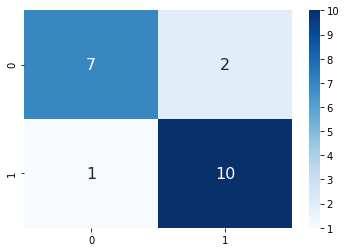

In [ ]:
print("confusion matrix using Heatmap \n\n\n")

M = confusion_matrix(y_test,y_pred)
sns.heatmap(M, cmap="Blues", annot=True,annot_kws={"size": 16})